In [6]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sns
from scipy import stats 
import csv
from scipy import constants
from scipy.integrate import odeint
from tqdm import tqdm
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo# WMAP9 as cosmo #
from astropy import constants as const
import astropy.units as u
#from astropy.cosmology import WMAP9, z_at_value
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#pl.rcParams['figure.figsize'] = (16, 9)
#pl.style.use('ggplot')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#
#from mlxtend.plotting import plot_linear_regression
from sympy import *
from sympy import simplify

In [7]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
G = const.G
c = const.c
z_r = 5000 #3450
z_eq = 3411
z_0 = 0
z_init = 6.900e9
rho_c0 = (3*(H0**2))/(8*math.pi*G)
rho_c01 = cosmo.critical_density(0)
Omega_DM = cosmo.Odm(0)
Omega_M = cosmo.Om(0)
Omega_R = 8.4e-5
Omega_lmb = 1-Omega_M - Omega_R

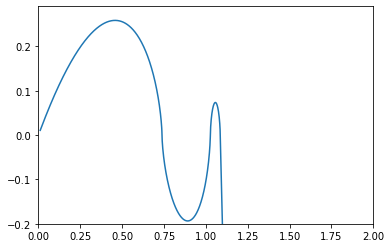

In [8]:
#lmd = 0.9316 
#lmd = 0.42#000000000000026
lmd = 0.94#399999999999996
#lmd= 0.123#00000000000003
#lmd = 0.07970000000000001
#lmd = 1.
y0 = np.array([0.01,1.0])


def pend(y, s, lmd):
    #return np.array([y[1], y[1]*(1./s) - y[0]/(s**(2.)) - (s**(2.)*np.sign(y[0]))/(lmd*y[0]**(2.))])
    #return np.array([y[1], -y[1]*((1./2.)*(-3.*s**(-4.) - 4.*s**(-5.))*((s**(-3.)+s**(-4.))**(-1.)) + 1./s) + y[0]*(((1./s)*(0.5)*(-3.*s**(-4.) - 4.*s**(-5.))*((s**(-3.)+s**(-4.))**(-1.)))+(1./s**(2.))) - ((1./lmd)*(1./(s**(2.)*(s**(-3.) + s**(-4.))))*(1./y[0]**(2.))*(np.sign(y[0])))], dtype='double')
    return np.array([y[1],-y[1]*((1./2.)*(-3.*s**(-4.) - 4.*s**(-5.))*((1/s**(3.) + 1./s**(4.))**(-1.)) + 1./s) + y[0]*(((1./s)*(0.5)*(-3.*s**(-4.) - 4.*s**(-5.))*((s**(-3.)+s**(-4.))**(-1.)))+(1./s**(2.))) - ((1./lmd)*(1./(s**(2.)*(s**(-3.) + s**(-4.))))*(1./y[0]**(2.))*(np.sign(y[0])))],dtype='double')
    
#def pend_2(y,s,lmd):
#    return np.array([y[1], simplify(-y[1]*((1./2.)*(-3.*s**(-4.) - 4.*s**(-5.))*((1/s**(3.) + 1./s**(4.))**(-1.)) + 1./s) + y[0]*(((1./s)*(0.5)*(-3.*s**(-4.) - 4.*s**(-5.))*((s**(-3.)+s**(-4.))**(-1.)))+(1./s**(2.))))],dtype='double')

    
def rungekutta4(f, y0, s, args=()):
    n = len(s)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = s[i+1] - s[i]
        k1 = f(y[i], s[i], *args)
        k2 = f(y[i] + k1 * h / 2., s[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., s[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, s[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2.*k2 + 2.*k3 + k4)
    return y

s = np.arange(0.01, 2.0, 0.001)
sol = rungekutta4(pend, y0, s, args=(lmd, ))
#sol_2 = rungekutta4(pend_2, y0, s, args=(lmd, ))

pl.plot(s/lmd , sol[:,0]/lmd, '-')
#pl.plot(s*lmd, sol_2[:,0]*lmd,':')
pl.ylim(-0.2,0.29)
pl.xlim(0.0,2.0)
pl.show()

Maximum Point (s/λ , X/λ)
0.45744680851063796 , 0.2583765659308759
Maximum Point:
s = 0.42999999999999966


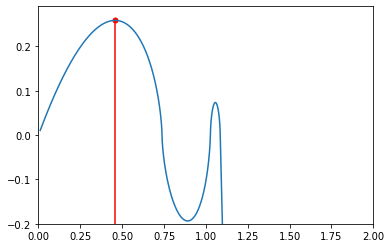

In [9]:
#---- to get the maximum value to RK4th
#print(np.where(sol == max(sol[:,0])))
print("Maximum Point (s/λ , X/λ)")
print(s[420]/lmd,",",max(sol[:,0]/lmd))
print("Maximum Point:")
print("s =", s[420])
pl.axvline(x=(s[420]/lmd), ymin = -0.2, ymax = 0.93, color ='red')
pl.plot(s[420]/lmd, max(sol[:,0]/lmd), marker='o', markersize=5, color="red")
pl.plot(s/lmd , sol[:,0]/lmd, '-')
#pl.plot(s/lmd, sol_2[:,0]/lmd,':')
pl.ylim(-0.2,0.29)
pl.xlim(0.0,2.0)
pl.show()

/home/thaddaios/.local/lib/python3.8/site-packages/astropy/cosmology/core.py:1171: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  f = lambda red: quad(self._lookback_time_integrand_scalar,


10617.011761561069 yr


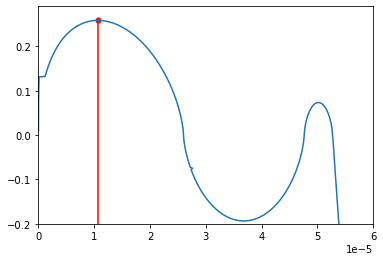

In [10]:
redshift = []
cosmic_time = []
for j in s:
    red_Z = ((1.+z_eq)/j - 1.)
    age_universe = cosmo.age(red_Z)
    cosmic_time.append(age_universe/u.Gyr)
    redshift.append(red_Z)
    
print((cosmo.age((1.+z_eq)/s[420] - 1.)).to(u.yr))

pl.axvline(x=cosmic_time[420], ymin = -0.2, ymax = 0.93, color ='red')
pl.plot(cosmic_time[420], max(sol[:,0]/lmd), marker='o', markersize=5, color="red")
pl.plot(cosmic_time, sol[:,0]/lmd)
pl.ylim(-0.2,0.29)
pl.xlim(0.0, 0.00006)
pl.show()

In [11]:
rho_eq = cosmo.critical_density(3411)
rho_crit = cosmo.critical_density(0)
f_PBH = 1.
M = 30.*(u.M_sun)
x_barra = ((3*M)/(4*math.pi*f_PBH*rho_eq))**(1./3.)
lmd = 0.0437
x = np.arange(0.0,1.0,0.001)
a_array = []
for i in x:
    a = (0.1/f_PBH)*(i**(4))*(x_barra)
    print(i,"\t",a.to(u.AU))
    a_array.append(a) # units 1/AU
#print(a_array)

0.0 	 0.0 AU
0.001 	 2.716098471220373e-09 AU
0.002 	 4.3457575539525965e-08 AU
0.003 	 2.2000397616885015e-07 AU
0.004 	 6.953212086324154e-07 AU
0.005 	 1.6975615445127327e-06 AU
0.006 	 3.5200636187016024e-06 AU
0.007 	 6.521352429400114e-06 AU
0.008 	 1.1125139338118647e-05 AU
0.009000000000000001 	 1.782032206967687e-05 AU
0.01 	 2.7160984712203723e-05 AU
0.011 	 3.976639771713746e-05 AU
0.012 	 5.632101789922564e-05 AU
0.013000000000000001 	 7.757448843652508e-05 AU
0.014 	 0.00010434163887040182 AU
0.015 	 0.00013750248510553133 AU
0.016 	 0.00017800222940989835 AU
0.017 	 0.0002268512604147968 AU
0.018000000000000002 	 0.0002851251531148299 AU
0.019 	 0.0003539646688679101 AU
0.02 	 0.00043457575539525956 AU
0.021 	 0.0005282295467814094 AU
0.022 	 0.0006362623634741994 AU
0.023 	 0.0007600757122847801 AU
0.024 	 0.0009011362863876102 AU
0.025 	 0.001060975965320458 AU
0.026000000000000002 	 0.0012411918149844014 AU
0.027 	 0.0014434460876438257 AU
0.028 	 0.0016694662219264291

0.358 	 44.61466308287477 AU
0.359 	 45.11524346698525 AU
0.36 	 45.62002449837276 AU
0.361 	 46.12902961153492 AU
0.362 	 46.642282306155664 AU
0.363 	 47.15980614710538 AU
0.364 	 47.68162476444074 AU
0.365 	 48.2077618534048 AU
0.366 	 48.738241174427 AU
0.367 	 49.27308655312314 AU
0.368 	 49.81232188029535 AU
0.369 	 50.355971111932156 AU
0.37 	 50.904058269208434 AU
0.371 	 51.45660743848544 AU
0.372 	 52.01364277131076 AU
0.373 	 52.57518848441837 AU
0.374 	 53.14126885972861 AU
0.375 	 53.71190824434818 AU
0.376 	 54.287131050570125 AU
0.377 	 54.86696175587387 AU
0.378 	 55.45142490292522 AU
0.379 	 56.04054509957629 AU
0.38 	 56.63434701886562 AU
0.381 	 57.23285539901808 AU
0.382 	 57.83609504344491 AU
0.383 	 58.444090820743696 AU
0.384 	 59.05686766469842 AU
0.385 	 59.67445057427942 AU
0.386 	 60.296864613643365 AU
0.387 	 60.92413491213333 AU
0.388 	 61.55628666427872 AU
0.389 	 62.19334512979533 AU
0.39 	 62.8353356335853 AU
0.391 	 63.48228356573712 AU
0.392 	 64.13421

0.706 	 674.7832836337102 AU
0.707 	 678.6145488656999 AU
0.708 	 682.4621057723784 AU
0.709 	 686.3260004730984 AU
0.71 	 690.2062791523978 AU
0.711 	 694.1029880600013 AU
0.712 	 698.0161735108203 AU
0.713 	 701.9458818849523 AU
0.714 	 705.8921596276812 AU
0.715 	 709.8550532494769 AU
0.716 	 713.8346093259963 AU
0.717 	 717.8308744980823 AU
0.718 	 721.843895471764 AU
0.719 	 725.8737190182572 AU
0.72 	 729.9203919739641 AU
0.721 	 733.9839612404731 AU
0.722 	 738.0644737845587 AU
0.723 	 742.161976638182 AU
0.724 	 746.2765168984906 AU
0.725 	 750.4081417278188 AU
0.726 	 754.556898353686 AU
0.727 	 758.7228340687994 AU
0.728 	 762.9059962310519 AU
0.729 	 767.1064322635225 AU
0.73 	 771.3241896544768 AU
0.731 	 775.5593159573673 AU
0.732 	 779.811858790832 AU
0.733 	 784.0818658386961 AU
0.734 	 788.3693848499703 AU
0.735 	 792.6744636388521 AU
0.736 	 796.9971500847256 AU
0.737 	 801.3374921321607 AU
0.738 	 805.6955377909145 AU
0.739 	 810.0713351359293 AU
0.74 	 814.4649323073

In [23]:
m1 = m2 = M
Q = (3/85)*((c**5)/(G**3 * m1*m2*(m1+m2)))
l_pbh = ((M/(f_PBH*Omega_DM*rho_c0))**(1/3)).to(u.AU)
etha = (l_pbh*H0/c).to(u.AU/u.AU)
#z1 = (-(etha**(2) * Omega_M) + math.sqrt(((etha**(2))*Omega_M)**(2) + (4*(etha**(2))*Omega_R)))/(2*etha**(2)*Omega_R)
red_Z = ((1.+z_eq)/s[420] - 1.)
npbh = (f_PBH*Omega_DM*rho_c0)/M
lpbh_z = (l_pbh*(1/(1+red_Z)))

e_max = math.sqrt(1-((f_PBH)**(3/2)*(lpbh_z/x_barra)**(3/2)))
#e_maxim = math.sqrt(1 - (4*math.pi*npbh/3)**(2) * ((((1+z_eq)*M)/(rho_c0*Omega_DM))*lpbh_z)**(3/2))

#print(e_max)

def t_merger(a, e): #Equation 148
    t = Q*(1 - e**2)**(7/2) * (a**4)
    return t

#for k in a_array:
#    print(k.to(u.AU), "\t\t ",(t_merger(k.to(u.AU),e_max)).to(u.yr))

print("x_value \t\t\t a_separation_value \t\t\t merger_time_value")
for i, k in zip(x, a_array):
    print("%.4f" % i," \t\t ",k.to(u.AU), "\t\t ",(t_merger(k.to(u.AU),e_max)).to(u.yr))
    

x_value 			 a_separation_value 			 merger_time_value
0.0000  		  0.0 AU 		  0.0 yr
0.0010  		  2.716098471220373e-09 AU 		  3.906240500293145e-22 yr
0.0020  		  4.3457575539525965e-08 AU 		  2.5599937742721156e-17 yr
0.0030  		  2.2000397616885015e-07 AU 		  1.681508449750193e-14 yr
0.0040  		  6.953212086324154e-07 AU 		  1.6777175199069737e-12 yr
0.0050  		  1.6975615445127327e-06 AU 		  5.960449982136752e-11 yr
0.0060  		  3.5200636187016024e-06 AU 		  1.1019933776282864e-09 yr
0.0070  		  6.521352429400114e-06 AU 		  1.2981581933440549e-08 yr
0.0080  		  1.1125139338118647e-05 AU 		  1.0995089538462343e-07 yr
0.0090  		  1.782032206967687e-05 AU 		  7.238342509553919e-07 yr
0.0100  		  2.7160984712203723e-05 AU 		  3.906240500293142e-06 yr
0.0110  		  3.976639771713746e-05 AU 		  1.794906957706147e-05 yr
0.0120  		  5.632101789922564e-05 AU 		  7.222023799624738e-05 yr
0.0130  		  7.757448843652508e-05 AU 		  0.0002599277308359075 yr
0.0140  		  0.00010434163887040182 AU 		  0.0008

0.1690  		  2.2156049642355926 AU 		  172960229285507.72 yr
0.1700  		  2.268512604147968 AU 		  190082318497265.8 yr
0.1710  		  2.322362192442359 AU 		  208783774534233.38 yr
0.1720  		  2.3771648433937105 AU 		  229199744431088.97 yr
0.1730  		  2.4329317364633307 AU 		  251476049085769.88 yr
0.1740  		  2.4896741162988887 AU 		  275769956770574.34 yr
0.1750  		  2.5474032927344203 AU 		  302251007720841.2 yr
0.1760  		  2.6061306407903206 AU 		  331101892849259.06 yr
0.1770  		  2.6658676006733533 AU 		  362519389796623.75 yr
0.1780  		  2.7266256777766418 AU 		  396715359700250.5 yr
0.1790  		  2.788416442679673 AU 		  433917808239691.94 yr
0.1800  		  2.8512515311482973 AU 		  474372014706124.44 yr
0.1810  		  2.915142644134729 AU 		  518341733037166.1 yr
0.1820  		  2.9801015477775463 AU 		  566110468963279.5 yr
0.1830  		  3.0461400734016877 AU 		  617982837625681.0 yr
0.1840  		  3.1132701175184594 AU 		  674286006249192.8 yr
0.1850  		  3.181503641825527 AU 		  73537122668707

0.3110  		  25.408970393680303 AU 		  2.991749333465373e+18 yr
0.3120  		  25.737353475516535 AU 		  3.1494337909139164e+18 yr
0.3130  		  26.068909313459955 AU 		  3.3148843344328054e+18 yr
0.3140  		  26.403658278249086 AU 		  3.488456788035805e+18 yr
0.3150  		  26.741620805808843 AU 		  3.6705220651092e+18 yr
0.3160  		  27.082817397250473 AU 		  3.861466757170167e+18 yr
0.3170  		  27.42726861887162 AU 		  4.0616937436151316e+18 yr
0.3180  		  27.77499510215624 AU 		  4.271622823136094e+18 yr
0.3190  		  28.126017543774708 AU 		  4.491691367502841e+18 yr
0.3200  		  28.48035670558373 AU 		  4.722354998428746e+18 yr
0.3210  		  28.838033414626388 AU 		  4.964088288258938e+18 yr
0.3220  		  29.19906856313212 AU 		  5.217385485240488e+18 yr
0.3230  		  29.563483108516724 AU 		  5.482761264156207e+18 yr
0.3240  		  29.931298073382376 AU 		  5.760751503125854e+18 yr
0.3250  		  30.302534545517606 AU 		  6.051914087401407e+18 yr
0.3260  		  30.6772136778973 AU 		  6.356829741006513e+18 

0.4800  		  144.18180582201762 AU 		  3.10183560303219e+21 yr
0.4810  		  145.38708082268622 AU 		  3.2068614760234353e+21 yr
0.4820  		  146.5998966198878 AU 		  3.315214172501441e+21 yr
0.4830  		  147.82028460085633 AU 		  3.4269918416228744e+21 yr
0.4840  		  149.04827621801206 AU 		  3.5422953157082376e+21 yr
0.4850  		  150.2839029889617 AU 		  3.661228177809098e+21 yr
0.4860  		  151.52719649649825 AU 		  3.783896830831743e+21 yr
0.4870  		  152.7781883886011 AU 		  3.9104105682497836e+21 yr
0.4880  		  154.03691037843598 AU 		  4.0408816464388487e+21 yr
0.4890  		  155.30339424435502 AU 		  4.1754253586671327e+21 yr
0.4900  		  156.57767182989673 AU 		  4.3141601107761635e+21 yr
0.4910  		  157.85977504378587 AU 		  4.45720749858682e+21 yr
0.4920  		  159.1497358599337 AU 		  4.604692387066335e+21 yr
0.4930  		  160.44758631743784 AU 		  4.756742991292537e+21 yr
0.4940  		  161.75335852058205 AU 		  4.913490959252397e+21 yr
0.4950  		  163.06708463883683 AU 		  5.07507145651265

0.6370  		  447.20148851336813 AU 		  2.8707137923860087e+23 yr
0.6380  		  450.0162807003953 AU 		  2.9436748546066618e+23 yr
0.6390  		  452.8443397518881 AU 		  3.018371621786159e+23 yr
0.6400  		  455.6857072893397 AU 		  3.094842571770263e+23 yr
0.6410  		  458.54042499942915 AU 		  3.1731269732204694e+23 yr
0.6420  		  461.4085346340222 AU 		  3.2532649005933775e+23 yr
0.6430  		  464.290078010171 AU 		  3.3352972493797286e+23 yr
0.6440  		  467.1850970101139 AU 		  3.419265751607206e+23 yr
0.6450  		  470.09363358127575 AU 		  3.505212991611156e+23 yr
0.6460  		  473.0157297362676 AU 		  3.593182422077412e+23 yr
0.6470  		  475.951427552887 AU 		  3.6832183803615054e+23 yr
0.6480  		  478.900769174118 AU 		  3.77536610508856e+23 yr
0.6490  		  481.8637968081306 AU 		  3.8696717530382626e+23 yr
0.6500  		  484.8405527282817 AU 		  3.9661824163193864e+23 yr
0.6510  		  487.83107927311386 AU 		  4.064946139838277e+23 yr
0.6520  		  490.8354188463568 AU 		  4.1660119390660285e+23 yr

0.7860  		  1036.6584576225962 AU 		  8.289335455211324e+24 yr
0.7870  		  1041.944149693773 AU 		  8.459694818693732e+24 yr
0.7880  		  1047.2500289767102 AU 		  8.63333231923827e+24 yr
0.7890  		  1052.5761468056692 AU 		  8.810306755747951e+24 yr
0.7900  		  1057.9225545800969 AU 		  8.990677905199515e+24 yr
0.7910  		  1063.2893037646274 AU 		  9.174506537642324e+24 yr
0.7920  		  1068.6764458890814 AU 		  9.361854431407733e+24 yr
0.7930  		  1074.0840325484646 AU 		  9.552784388531727e+24 yr
0.7940  		  1079.5121154029705 AU 		  9.747360250393625e+24 yr
0.7950  		  1084.9607461779783 AU 		  9.945646913573376e+24 yr
0.7960  		  1090.4299766640536 AU 		  1.0147710345930421e+25 yr
0.7970  		  1095.9198587169483 AU 		  1.0353617602906856e+25 yr
0.7980  		  1101.4304442576008 AU 		  1.056343684405771e+25 yr
0.7990  		  1106.961785272136 AU 		  1.0777237349811285e+25 yr
0.8000  		  1112.5139338118645 AU 		  1.0995089538462336e+25 yr
0.8010  		  1118.0869419932847 AU 		  1.12170649834012

0.9330  		  2058.126601888105 AU 		  1.2878499885962002e+26 yr
0.9340  		  2066.9644919291236 AU 		  1.3101137303712315e+26 yr
0.9350  		  2075.8308148331494 AU 		  1.3327379130235049e+26 yr
0.9360  		  2084.72563151684 AU 		  1.3557279770544392e+26 yr
0.9370  		  2093.6490029620372 AU 		  1.379089439136834e+26 yr
0.9380  		  2102.6009902157707 AU 		  1.4028278930982508e+26 yr
0.9390  		  2111.5816543902565 AU 		  1.4269490109159973e+26 yr
0.9400  		  2120.591056662896 AU 		  1.4514585437238688e+26 yr
0.9410  		  2129.6292582762776 AU 		  1.4763623228307705e+26 yr
0.9420  		  2138.6963205381767 AU 		  1.5016662607513364e+26 yr
0.9430  		  2147.792304821553 AU 		  1.5273763522486749e+26 yr
0.9440  		  2156.9172725645553 AU 		  1.5534986753893954e+26 yr
0.9450  		  2166.0712852705165 AU 		  1.5800393926109964e+26 yr
0.9460  		  2175.254404507957 AU 		  1.6070047518018057e+26 yr
0.9470  		  2184.466691910584 AU 		  1.6344010873935626e+26 yr
0.9480  		  2193.708209177289 AU 		  1.662234821

In [44]:
(2439270270.2885427*u.yr).to(u.Gyr)
(77090.66682710756*u.yr).to(u.Gyr)

<Quantity 7.70906668e-05 Gyr>